# Bar graphs

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the mouse cage time files
directory = '../data/intermediate/'

# Get a list of all the subdirectories in the intermediate directory
subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Define the cage labels and colors
cage_labels = ['red_cage', 'orange_cage', 'yellow_cage', 'green_cage', 'blue_cage']
cage_colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Create a directory to save the output figures
output_directory = '../results/'
os.makedirs(output_directory, exist_ok=True)

# Iterate over each subdirectory
for subdirectory in subdirectories:
    # Get a list of all the mouse cage time files in the subdirectory
    mouse_files = [file for file in os.listdir(os.path.join(directory, subdirectory)) if file.startswith('mouse_') and file.endswith('_cage_time.csv')]

    # Create a subdirectory to save the output figures for the current day
    day_output_directory = os.path.join(output_directory, subdirectory)
    os.makedirs(day_output_directory, exist_ok=True)

    # Iterate over each mouse file
    for mouse_file in mouse_files:
        # Import the data
        df = pd.read_csv(os.path.join(directory, subdirectory, mouse_file))

        # Extract the mouse identifier from the filename
        mouse_id = mouse_file.split('_')[1]

        # Create a figure and axis
        fig, ax = plt.subplots(figsize=(12, 6))

        # Set the width of each bar
        bar_width = 0.15

        # Set the positions of the bars on the x-axis
        bar_positions = [i for i in range(24)]

        # Iterate over each cage label and plot the bars
        for i, cage in enumerate(cage_labels):
            # Get the time values for the current cage
            cage_times = df[cage].values

            # Calculate the positions of the bars for the current cage
            positions = [pos + i * bar_width for pos in bar_positions]

            # Plot the bars for the current cage
            ax.bar(positions, cage_times, width=bar_width, label=cage, color=cage_colors[i])

        # Set the x-axis tick positions and labels
        ax.set_xticks([pos + 2 * bar_width for pos in bar_positions])
        ax.set_xticklabels(range(24))

        # Set the x-axis and y-axis labels
        ax.set_xlabel('Hour of the Day')
        ax.set_ylabel('Time (minutes)')

        # Set the title of the graph
        ax.set_title(f'Time Spent in Cages - Mouse {mouse_id} - {subdirectory}')

        # Add a legend to the graph
        ax.legend()

        # Save the figure to the output directory for the current day
        output_file = os.path.join(day_output_directory, f'mouse_{mouse_id}_cage_time_graph.png')
        plt.savefig(output_file)

        # Close the figure to free up memory
        plt.close(fig)

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Directory containing the mouse cage time files
directory = '../data/intermediate/'

# Get a list of all the mouse cage time files
mouse_files = [file for file in os.listdir(directory) if file.startswith('mouse_') and file.endswith('_cage_time.csv')]

# Define the cage labels and colors
cage_labels = ['red_cage', 'orange_cage', 'yellow_cage', 'green_cage', 'blue_cage']
cage_colors = ['red', 'orange', 'yellow', 'green', 'blue']

# Create a directory to save the output figures
output_directory = '../results/'
os.makedirs(output_directory, exist_ok=True)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over each mouse file
for i, mouse_file in enumerate(mouse_files):
    # Import the data
    df = pd.read_csv(os.path.join(directory, mouse_file))
    
    # Extract the mouse identifier from the filename
    mouse_id = mouse_file.split('_')[1]
    
    # Calculate the total time spent in each cage
    total_times = df[cage_labels].sum().values
    
    # Plot the bars for the current mouse
    ax.bar([i + 0.1 * j for j in range(len(cage_labels))], total_times, width=0.1, label=f'Mouse {mouse_id}', color=cage_colors)

# Set the x-axis tick positions and labels
ax.set_xticks([i + 0.2 for i in range(len(mouse_files))])
ax.set_xticklabels([f'Mouse {file.split("_")[1]}' for file in mouse_files])

# Set the y-axis label
ax.set_ylabel('Total Time (minutes)')

# Set the title of the graph
ax.set_title('Total Time Spent in Each Cage')

# Add a legend to the graph
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure to the output directory
output_file = os.path.join(output_directory, 'total_cage_time_graph.png')
plt.savefig(output_file, bbox_inches='tight')

# Close the figure to free up memory
plt.close(fig)

# Heatmap 1

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the mouse cage time files
directory = '../data/intermediate/'

# Get a list of all the subdirectories in the intermediate directory
subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Define the cage labels
cage_labels = ['red_cage', 'orange_cage', 'yellow_cage', 'green_cage', 'blue_cage']

# Create a directory to save the output figures
output_directory = '../results/'
os.makedirs(output_directory, exist_ok=True)

# Iterate over each subdirectory
for subdirectory in subdirectories:
    # Get a list of all the mouse cage time files in the subdirectory
    mouse_files = [file for file in os.listdir(os.path.join(directory, subdirectory)) if file.startswith('mouse_') and file.endswith('_cage_time.csv')]
    
    # Create a subdirectory to save the output figures for the current day
    day_output_directory = os.path.join(output_directory, subdirectory)
    os.makedirs(day_output_directory, exist_ok=True)
    
    # Create an empty DataFrame to store the total cage times for each mouse
    total_cage_times_df = pd.DataFrame(columns=cage_labels)
    
    # Iterate over each mouse file
    for mouse_file in mouse_files:
        # Import the data
        df = pd.read_csv(os.path.join(directory, subdirectory, mouse_file))
        
        # Extract the mouse identifier from the filename
        mouse_id = mouse_file.split('_')[1]
        
        # Calculate the total time spent in each cage
        total_times = df[cage_labels].sum()
        
        # Add the total times to the DataFrame with the mouse identifier as the index
        total_cage_times_df.loc[mouse_id] = total_times
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Create a heatmap using seaborn
    sns.heatmap(total_cage_times_df, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Total Time (minutes)'})
    
    # Set the x-axis and y-axis labels
    ax.set_xlabel('Cage')
    ax.set_ylabel('Mouse')
    
    # Set the title of the graph
    ax.set_title(f'Total Time Spent in Each Cage - {subdirectory}')
    
    # Adjust the spacing between subplots
    plt.tight_layout()
    
    # Save the figure to the output directory for the current day
    output_file = os.path.join(day_output_directory, 'total_cage_time_heatmap.png')
    plt.savefig(output_file)
    
    # Close the figure to free up memory
    plt.close(fig)

# Heatmap 2 red cage only when feeder active

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the mouse cage time files
directory = '../data/intermediate/'

# Get a list of all the subdirectories in the intermediate directory
subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Create a directory to save the output figure
output_directory = '../results/'
os.makedirs(output_directory, exist_ok=True)

# Create an empty DataFrame to store the red cage times for each mouse and date
red_cage_times_df = pd.DataFrame()

# Iterate over each subdirectory
for subdirectory in subdirectories:
    # Get a list of all the mouse cage time files in the subdirectory
    mouse_files = [file for file in os.listdir(os.path.join(directory, subdirectory)) if file.startswith('mouse_') and file.endswith('_cage_time.csv')]
    
    # Iterate over each mouse file
    for mouse_file in mouse_files:
        # Import the data
        df = pd.read_csv(os.path.join(directory, subdirectory, mouse_file))
        
        # Extract the mouse identifier from the filename
        mouse_id = mouse_file.split('_')[1]
        
        # Filter the data for the red cage and time between 11:00 AM and 1:00 PM (hours 11 and 12)
        red_cage_df = df[(df['Hour'] >= 11) & (df['Hour'] <= 12)][['red_cage']]
        
        # Calculate the total time spent in the red cage between 11:00 AM and 1:00 PM
        total_time = red_cage_df['red_cage'].sum()
        
        # Add the total time to the DataFrame with the mouse identifier as the index and date as the column
        red_cage_times_df.loc[mouse_id, subdirectory] = total_time

# Fill any missing values with 0
red_cage_times_df.fillna(0, inplace=True)

# Convert the column names (dates) to datetime format
red_cage_times_df.columns = pd.to_datetime(red_cage_times_df.columns)

# Sort the columns (dates) in chronological order
red_cage_times_df = red_cage_times_df.reindex(columns=sorted(red_cage_times_df.columns))

# Format the column names (dates) as "Month Day"
red_cage_times_df.columns = red_cage_times_df.columns.strftime('%B %d')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a heatmap using seaborn
sns.heatmap(red_cage_times_df, annot=True, cmap='YlOrRd', fmt='.2f', cbar_kws={'label': 'Time in Red Cage (minutes)'})

# Set the x-axis and y-axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Mouse')

# Set the title of the graph
ax.set_title('Time Spent in Red Cage between 11:00 AM and 1:00 PM')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the figure to the output directory
output_file = os.path.join(output_directory, 'red_cage_time_heatmap.png')
plt.savefig(output_file)

# Close the figure to free up memory
plt.close(fig)

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directory containing the intermediate files
directory = '../data/intermediate/'

# Get a list of all the subdirectories in the intermediate directory
subdirectories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

# Define the cage labels
cage_labels = ['red_cage', 'orange_cage', 'yellow_cage', 'green_cage', 'blue_cage']

# Create a directory to save the output figures
output_directory = '../results/'
os.makedirs(output_directory, exist_ok=True)

# Get a sorted list of all the unique mouse identifiers
mouse_identifiers = sorted({file.split('_')[1] for subdirectory in subdirectories for file in os.listdir(os.path.join(directory, subdirectory)) if file.startswith('mouse_') and file.endswith('_cage_time.csv')})

# Create an empty DataFrame to store the total cage times for each mouse across all subdirectories
total_cage_times_df_all = pd.DataFrame(columns=cage_labels, index=mouse_identifiers)

# Iterate over each subdirectory
for subdirectory in subdirectories:
    # Create an empty DataFrame to store the total cage times for each mouse in the current subdirectory
    total_cage_times_df = pd.DataFrame(columns=cage_labels, index=mouse_identifiers)
    
    # Iterate over each mouse identifier
    for mouse_id in mouse_identifiers:
        # Check if the mouse file exists in the current subdirectory
        mouse_file = f'mouse_{mouse_id}_cage_time.csv'
        if mouse_file in os.listdir(os.path.join(directory, subdirectory)):
            # Import the data
            df = pd.read_csv(os.path.join(directory, subdirectory, mouse_file))
            
            # Calculate the total time spent in each cage
            total_times = df[cage_labels].sum()
            
            # Add the total times to the DataFrame with the mouse identifier as the index
            total_cage_times_df.loc[mouse_id] = total_times
    
    # Convert columns to numeric data type
    total_cage_times_df_all = total_cage_times_df_all.apply(pd.to_numeric, errors='coerce')

    # Fill any missing values with 0
    total_cage_times_df_all.fillna(0, inplace=True)

    # Create a figure and axis for the overall heatmap
    fig, ax = plt.subplots(figsize=(10, 8))

    # Create the overall heatmap using seaborn
    sns.heatmap(total_cage_times_df_all, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Total Time (minutes)'})

    # Set the x-axis and y-axis labels
    ax.set_xlabel('Cage')
    ax.set_ylabel('Mouse')

    # Set the title of the overall heatmap
    ax.set_title('Total Time Spent in Each Cage - All Days')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the overall heatmap to the output directory
    output_file = os.path.join(output_directory, 'total_cage_time_heatmap_all_days.png')
    plt.savefig(output_file)

    # Close the figure to free up memory
    plt.close(fig)

# Fill any missing values in the overall DataFrame with 0
total_cage_times_df_all.fillna(0, inplace=True)

# Create a figure and axis for the overall heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# Create the overall heatmap using seaborn
sns.heatmap(total_cage_times_df_all, annot=False, cmap='YlGnBu', cbar_kws={'label': 'Total Time (minutes)'})

# Set the x-axis and y-axis labels
ax.set_xlabel('Cage')
ax.set_ylabel('Mouse')

# Set the title of the overall heatmap
ax.set_title('Total Time Spent in Each Cage - All Days')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the overall heatmap to the output directory
output_file = os.path.join(output_directory, 'total_cage_time_heatmap_all_days.png')
plt.savefig(output_file)

# Close the figure to free up memory
plt.close(fig)

In [ ]:
import numpy as np
import pandas as pd
import os
from tqdm import tqdm  # Use standard tqdm

# Define the output directory
output_dir = '../data/processed/rural'
os.makedirs(output_dir, exist_ok=True)

# Import the dataset
data_dir = '../data/intermediate-processing/rural'
df = pd.read_parquet(os.path.join(data_dir, 'RFID_filtered.parquet'))

# Dictionary mapping unit number transitions to locations
location_map = {
    (1, 1): {'prior': [2, 3, 4, 5], 'location': 'red_tunnel', 'default': 'hub'},
    (2, 2): {'prior': [1, 3, 4, 5], 'location': 'orange_tunnel', 'default': 'hub'},
    (3, 3): {'prior': [1, 2, 4, 5], 'location': 'yellow_tunnel', 'default': 'hub'},
    (4, 4): {'prior': [1, 2, 3, 5], 'location': 'green_tunnel', 'default': 'hub'},
    (5, 5): {'prior': [1, 2, 3, 4], 'location': 'blue_tunnel', 'default': 'hub'},
    (1, 2): {'location': 'hub'},
    (1, 3): {'location': 'hub'},
    (1, 4): {'location': 'hub'},
    (1, 5): {'location': 'hub'},
    (2, 1): {'location': 'hub'},
    (2, 3): {'location': 'hub'},
    (2, 4): {'location': 'hub'},
    (2, 5): {'location': 'hub'},
    (3, 1): {'location': 'hub'},
    (3, 2): {'location': 'hub'},
    (3, 4): {'location': 'hub'},
    (3, 5): {'location': 'hub'},
    (4, 1): {'location': 'hub'},
    (4, 2): {'location': 'hub'},
    (4, 3): {'location': 'hub'},
    (4, 5): {'location': 'hub'},
    (5, 1): {'location': 'hub'},
    (5, 2): {'location': 'hub'},
    # Add remaining mappings as needed
}

# Initialize a list to collect all results
all_results = []

# Get the unique transponder codes
transponder_codes = df['Transponder code'].unique()

# Iterate over each transponder code with a progress bar
for transponder_code in tqdm(transponder_codes, desc='Processing Transponder Codes', position=0, leave=True):
    # Select the data for the current mouse
    mouse_data = df[df['Transponder code'] == transponder_code].copy()
    
    # Sort the DataFrame by 'Datetime'
    mouse_data = mouse_data.sort_values('Datetime')
    
    # Create a boolean mask to identify duplicate rows within a 1-second time window
    mask = mouse_data.groupby('Unit number')['Datetime'].diff().gt(pd.Timedelta(seconds=1))
    
    # Drop duplicate rows based on the boolean mask
    mouse_data = mouse_data[mask | ~mouse_data['Unit number'].duplicated()]
    
    # Reset the index of the DataFrame
    mouse_data = mouse_data.reset_index(drop=True)
    
    # Initialize an empty list to store the results for this mouse
    results = []
    
    # Iterate over each row of the mouse_data DataFrame with a progress bar
    for i in tqdm(range(len(mouse_data)), desc=f'Processing Rows for {transponder_code}', position=1, leave=True):
        current_unit = mouse_data.iloc[i]['Unit number']
        current_time = mouse_data.iloc[i]['Datetime']
        current_period = mouse_data.iloc[i].get('Period', 'UNKNOWN')  # Get 'Period' or set as 'UNKNOWN'
        
        if i == 0:
            # For the first row, set the location as "UNKNOWN"
            location = 'UNKNOWN'
        elif i == 1:
            # For the second row, set the location based on the transition
            prev_unit = mouse_data.iloc[i-1]['Unit number']
            transition = (prev_unit, current_unit)
            
            location = location_map.get(transition, {}).get('location', 'UNKNOWN')
        else:
            prev_unit = mouse_data.iloc[i-1]['Unit number']
            prev_location = results[-1][1]  # Get the previous location from the results list
            transition = (prev_unit, current_unit)
            
            loc_info = location_map.get(transition, {})
            if 'prior' in loc_info:
                if prev_unit in loc_info['prior']:
                    location = loc_info['location']
                else:
                    location = loc_info.get('default', 'UNKNOWN')
            else:
                location = loc_info.get('location', 'UNKNOWN')
            
            # Additional location adjustments
            if prev_location in ['green_tunnel', 'red_tunnel', 'orange_tunnel', 'yellow_tunnel', 'blue_tunnel']:
                hub_units = {'green_tunnel': 4, 'red_tunnel': 1, 'orange_tunnel': 2, 'yellow_tunnel': 3, 'blue_tunnel': 5}
                expected_unit = hub_units.get(prev_location, None)
                if expected_unit == current_unit and len(results) >= 2 and results[-2][1] == 'UNKNOWN':
                    results[-2][1] = 'hub'
            
            # Check for transitions from hub to tunnel
            if i >= 2:
                prev_prev_location = results[-2][1]
                if prev_prev_location == 'hub' and prev_location.endswith('_tunnel'):
                    location = 'hub'
        
        # Append the result to the list, including 'Period'
        results.append([current_time, location, current_unit, transponder_code, current_period])
    
    # Create a new DataFrame with the desired columns, including 'Period'
    result_df = pd.DataFrame(results, columns=['Time', 'Location', 'Unit number', 'Transponder code', 'Period'])
    
    # Apply additional logic for cage transitions
    for i in range(1, len(result_df)):
        prev_location = result_df.iloc[i-1]['Location']
        current_transition = (result_df.iloc[i-1]['Unit number'], result_df.iloc[i]['Unit number'])
        
        cage_transition_map = {
            ('red_cage', (6, 6)): 'red_tunnel',
            ('orange_cage', (7, 7)): 'orange_tunnel',
            ('yellow_cage', (8, 8)): 'yellow_tunnel',
            ('green_cage', (9, 9)): 'green_tunnel',
            ('blue_cage', (10, 10)): 'blue_tunnel',
        }
        
        if (prev_location, current_transition) in cage_transition_map:
            result_df.at[i, 'Location'] = cage_transition_map[(prev_location, current_transition)]
        
        # New logic: If previous row contains a 6 and current row contains a 6, then current location should be red_cage
        if result_df.iloc[i-1]['Unit number'] == 6 and result_df.iloc[i]['Unit number'] == 6:
            result_df.at[i, 'Location'] = 'red_cage'
    
    # Fill in the missing seconds in the time column
    start_time = result_df['Time'].min()
    end_time = result_df['Time'].max()
    all_seconds = pd.date_range(start=start_time, end=end_time, freq='S')
    
    # Merge the result DataFrame with the complete time range
    final_df = pd.merge(pd.DataFrame({'Time': all_seconds}), result_df, on='Time', how='left')
    
    # Apply the logic for transitions between cages and tunnels only if the value is UNKNOWN
    for i in range(1, len(final_df)):
        prev_location = final_df.iloc[i-1]['Location']
        current_location = final_df.iloc[i]['Location']
        
        if pd.notna(current_location) and current_location == 'UNKNOWN' and \
           pd.notna(prev_location) and (prev_location.endswith('_cage') or prev_location.endswith('_tunnel')) and \
           (current_location.endswith('_cage') or current_location.endswith('_tunnel')) and \
           prev_location != current_location:
            final_df.at[i, 'Location'] = 'hub'
    
    final_df['Location'] = final_df['Location'].fillna('UNKNOWN')
    final_df['Unit number'] = final_df['Unit number'].fillna(0).astype(int)
    final_df['Transponder code'] = final_df['Transponder code'].fillna('UNKNOWN')
    final_df['Period'] = final_df['Period'].fillna('UNKNOWN')
    
    # Reorder columns to include Transponder code and Period
    final_df = final_df[['Time', 'Location', 'Unit number', 'Transponder code', 'Period']]
    
    # Append the processed DataFrame to all_results
    all_results.append(final_df)

# Concatenate all results into a single DataFrame
processed_df = pd.concat(all_results, ignore_index=True)

# Save the final DataFrame as a Parquet file
processed_df.to_parquet(os.path.join(output_dir, 'RFID_processed.parquet'), index=False)

C:\Users\joshf\AppData\Local\Temp\ipykernel_30424\880127447.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Move', data=moves_per_hour, palette='viridis')


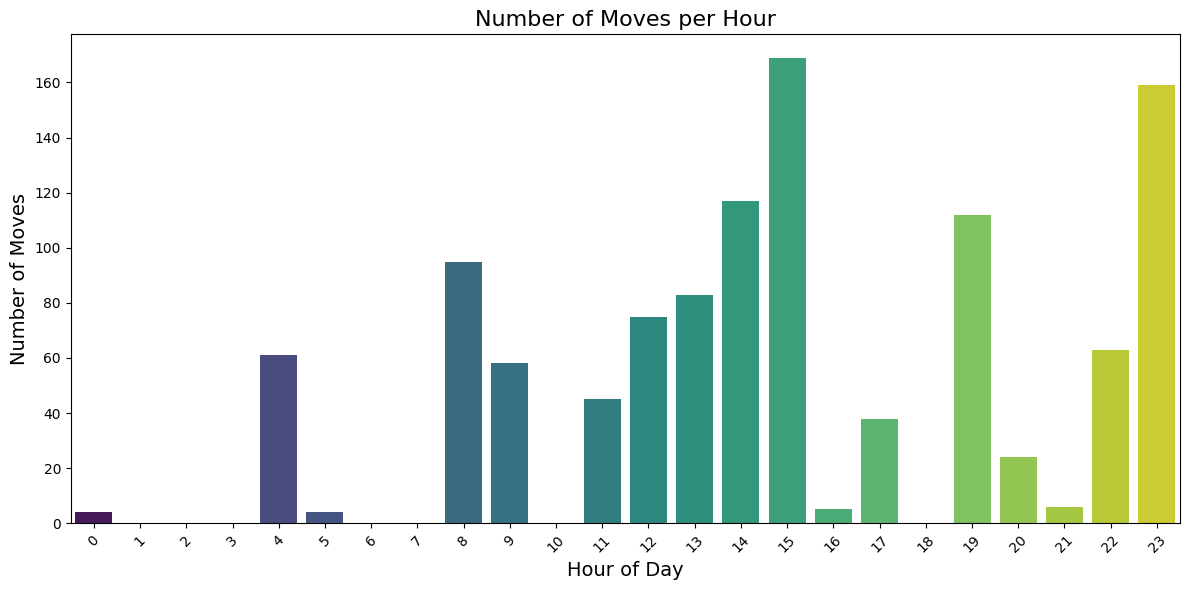

C:\Users\joshf\AppData\Local\Temp\ipykernel_30424\880127447.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Move', data=moves_per_hour_zero, palette='viridis')


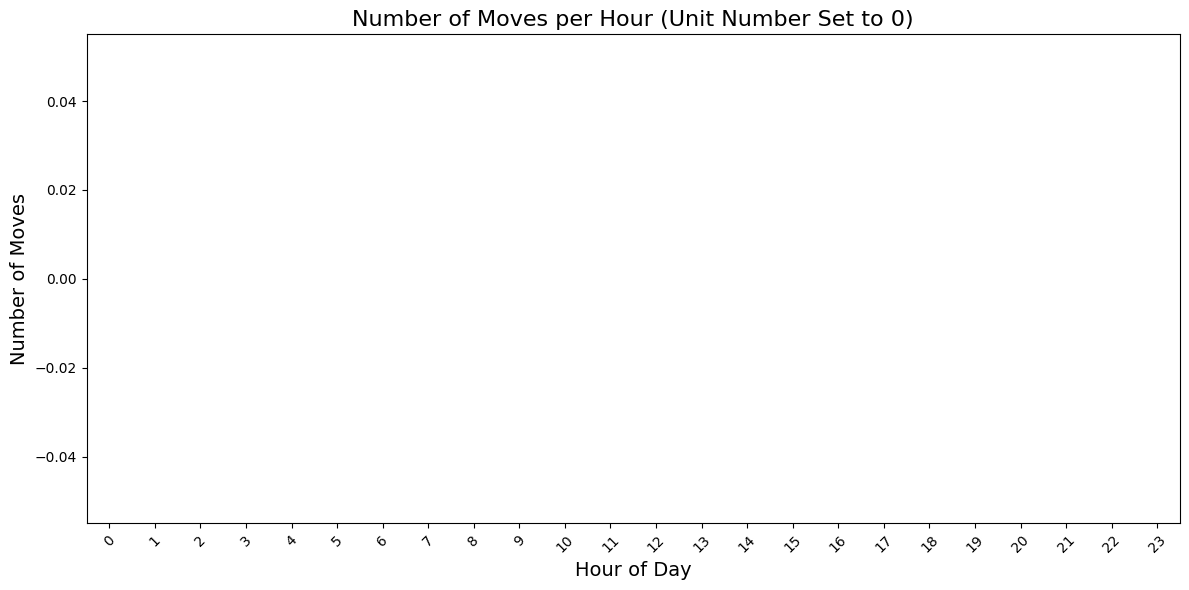

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure inline plotting for Jupyter Notebooks
%matplotlib inline

# Define the input directory
input_dir = '../data/processed/20240329'
processed_file = os.path.join(input_dir, 'mouse_0007A3A179_locations.csv')

# Load the processed DataFrame
processed_df = pd.read_csv(processed_file)

# Convert 'Time' column to datetime if not already
processed_df['Time'] = pd.to_datetime(processed_df['Time'])

# Sort the DataFrame by 'Time' to ensure chronological order
processed_df = processed_df.sort_values('Time').reset_index(drop=True)

# Since there's no 'Transponder code', we can assign a default value or ignore it
# For tracking moves, we don't need to set 'Unit number' to 0 as it represents different locations
# Instead, we track transitions between different 'Unit numbers'

# Compute 'Move' column: 1 if 'Unit number' changes from previous row, else 0
processed_df['Move'] = (processed_df['Unit number'] != processed_df['Unit number'].shift(1)).astype(int)

# The first entry cannot be a move since there's no previous data
processed_df.loc[0, 'Move'] = 0

# Extract hour from 'Time' for aggregating moves per hour
processed_df['Hour'] = processed_df['Time'].dt.hour

# Aggregate number of moves per hour
moves_per_hour = processed_df.groupby('Hour')['Move'].sum().reset_index()

# Plotting the number of moves per hour
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Move', data=moves_per_hour, palette='viridis')

plt.title('Number of Moves per Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Moves', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: If you still want to set 'Unit Number' to 0 before plotting
# Note: Setting 'Unit Number' to 0 will mean there are no moves since all entries will be the same
# Uncomment the following lines if you wish to proceed

# processed_df['Unit Number'] = 0
# processed_df['Move'] = 0  # No moves since 'Unit Number' doesn't change

# # Aggregate number of moves per hour (will all be 0)
# moves_per_hour_zero = processed_df.groupby('Hour')['Move'].sum().reset_index()

# # Plotting the number of moves per hour (all zeros)
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Hour', y='Move', data=moves_per_hour_zero, palette='viridis')

# plt.title('Number of Moves per Hour (Unit Number Set to 0)', fontsize=16)
# plt.xlabel('Hour of Day', fontsize=14)
# plt.ylabel('Number of Moves', fontsize=14)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

C:\Users\joshf\AppData\Local\Temp\ipykernel_30424\1363580703.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='Move', data=moves_per_hour, palette='viridis')


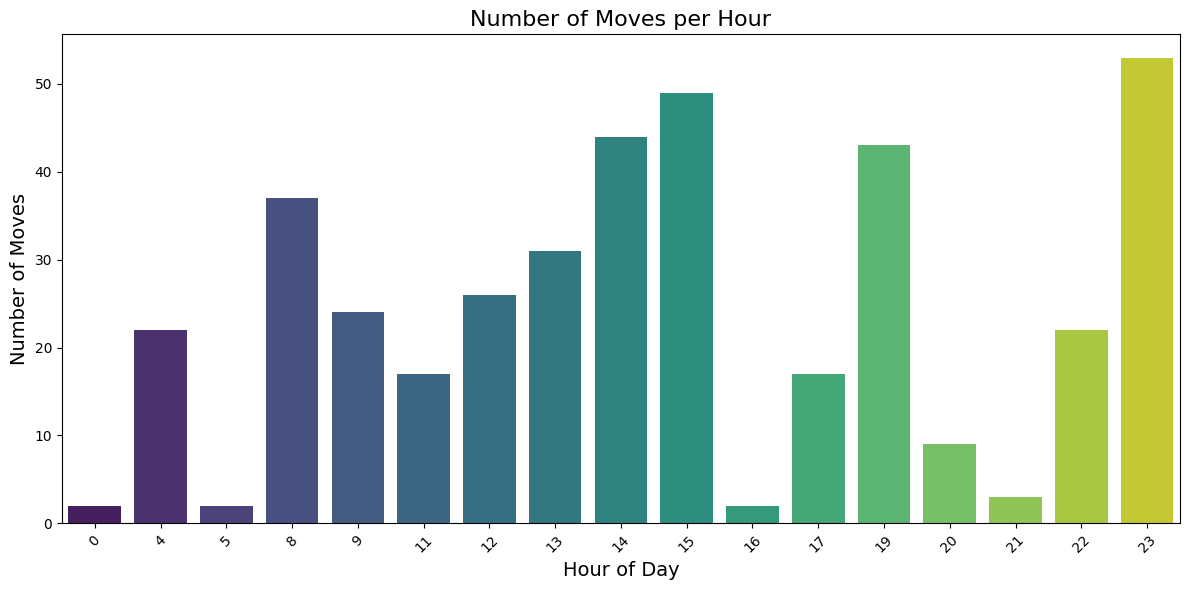

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure inline plotting for Jupyter Notebooks
%matplotlib inline

# Define the input directory
input_dir = '../data/processed/20240329'
processed_file = os.path.join(input_dir, 'mouse_0007A3A179_locations.csv')

# Load the processed DataFrame
processed_df = pd.read_csv(processed_file)

# Convert 'Time' column to datetime if not already
processed_df['Time'] = pd.to_datetime(processed_df['Time'])

# Sort the DataFrame by 'Time' to ensure chronological order
processed_df = processed_df.sort_values('Time').reset_index(drop=True)

# Filter out rows where 'Unit number' is 0
processed_df = processed_df[processed_df['Unit number'] != 0].reset_index(drop=True)

# Compute 'Move' column: 1 if 'Unit number' changes from previous row, else 0
processed_df['Move'] = (processed_df['Unit number'] != processed_df['Unit number'].shift(1)).astype(int)

# The first entry cannot be a move since there's no previous data
processed_df.loc[0, 'Move'] = 0

# Extract hour from 'Time' for aggregating moves per hour
processed_df['Hour'] = processed_df['Time'].dt.hour

# Aggregate number of moves per hour
moves_per_hour = processed_df.groupby('Hour')['Move'].sum().reset_index()

# Plotting the number of moves per hour
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour', y='Move', data=moves_per_hour, palette='viridis')

plt.title('Number of Moves per Hour', fontsize=16)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Moves', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: If you still want to set 'Unit number' to 0 before plotting
# Note: Setting 'Unit number' to 0 will mean there are no moves since all entries will be the same
# Uncomment the following lines if you wish to proceed

# processed_df['Unit number'] != 0
# processed_df['Move'] = 0  # No moves since 'Unit number' doesn't change

# # Aggregate number of moves per hour (will all be 0)
# moves_per_hour_zero = processed_df.groupby('Hour')['Move'].sum().reset_index()

# # Plotting the number of moves per hour (all zeros)
# plt.figure(figsize=(12, 6))
# sns.barplot(x='Hour', y='Move', data=moves_per_hour_zero, palette='viridis')

# plt.title('Number of Moves per Hour (Unit Number Set to 0)', fontsize=16)
# plt.xlabel('Hour of Day', fontsize=14)
# plt.ylabel('Number of Moves', fontsize=14)
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()